# Reparando dados ruins

## Carregando planilhas com buracos

Em alguns casos, as planilhas feitas para leitura humana não estão de acordo com o que precisamos para analisá-las computacionalmente, por exemplo:

In [335]:
import pandas as pd
df = pd.read_excel("../resources/livrovermelho2013occurrences2016-08-23-1308-failed.xls")

In [336]:
df

,familia aceita,nome aceito,id da ocorrência,literatura,código da instituição,código da coleção,número de catálogo/código de barras,número do coletor,coletor,ano da coleta,...,estado,município,localidade,latitude,longitude,família,nome científico,status SIG,válido,observações
0,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d7b2,NaN,NaN,RB,287116,2110,"Martinelli, G.",1977,...,ES,São Mateus,Lagoa do Macaco. REBIO de Sooretama. Obs.: hel...,-19.017326,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,NaN
1,NaN,NaN,54c7ca1f3d839,NaN,NaN,RB,35275,3381,"Kollmann, L.",2000,...,NaN,Barra de São Francisco,"Córrego das Palmas, terreno de Roberto Strey.",-18.677231,-40.838108,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,Erva rasteira na sombra. Folhas verdes escuras...
2,NaN,NaN,54c7ca1f3d8bb,NaN,NaN,RB,35287,3747,"Folli, D.A.",2000,...,NaN,Linhares,"Reserva Natural CVRD, Estrada Peroba Osso, Km ...",-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Terrestre, herbáceo, botão amarelo, flor amare..."
3,NaN,NaN,54c7ca1f3d93b,NaN,NaN,RB,35292,3304,"Folli, D.A.",1998,...,NaN,NaN,"Reserva Florestal, Estrada Municipal João Pedr...",-19.137500,-40.063611,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Herbácea rastejante, botão amarelo, flor amare..."
4,NaN,NaN,54c7ca1f3d9bc,NaN,NaN,RB,533846,80,"Carvalho, A.M.V. de",1978,...,NaN,NaN,Reserva Florestal da CIA Vale do Rio Doce. Mata.,-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Planta herbácea, esciófila com folhas verdes a..."
5,NaN,NaN,54c7ca1f3da3d,NaN,NaN,RB,533847,4993,"Martinelli, G.",1978,...,NaN,NaN,Reserva Florestal da CIA Vale do Rio Doce. Flo...,-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Esciófila, crescendo na mata; folhas na face v..."
6,NaN,NaN,54c7ca1f3dabc,NaN,NaN,RB,533849,2285,"Martinelli, G.",1977,...,NaN,São Mateus,Lagoa do Macuco. Reserva Biologica de Sooretama.,-19.017326,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Umbrófila, terrestre, estolonífera, crescendo ..."
7,NaN,NaN,54c7ca5212870,NaN,NaN,RB,533848,5701,"Sucre, D.",1969,...,NaN,NaN,Mata de Tabuleiro do Macuco. Reserva Biologica...,-19.018155,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,Umbrófila; folha verde escuro brilhante na fac...
8,NaN,NaN,54c7ca722d1e6,NaN,NaN,NMNH,3376138.2125585,NaN,A. Carvalho,1978,...,NaN,NaN,"Linhares Mun., Reserva Florestal da Cia, Vale ...",-19.137500,-40.063611,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,NaN
9,NaN,Aphelandra gigantea,54c7ca1f3db3d,NaN,NaN,HSJRP,1753,597,W. Boone,1985,...,NaN,Santa Teresa,"São João de Petrópolis, E.A.F.S.T.",-19.805556,-40.681389,ACANTHACEAE,Aphelandra gigantea,ok,True,"Arbusto rupícola, com flores de cálice verde e..."


Existem muitas células vazias, a ideia é que quando uma pessoa analisa esses dados, visualmente, ela sabe o que está vendo, é fácil entender o agrupamento. Mas ao analisar os dados com o pandas (ou outra ferramenta) teremos problemas identificando o valor das céclulas vazias, pois computacionalmente precisaríamos da visão global, e não linha a linha.

In [337]:
import math

def rename_by_visual_group(df, column_name):
    s = df[column_name].copy()

    last_val = ''

    for i, v in s.iteritems():
        if type(v) is not str and math.isnan(v):
            s[i] = last_val
        else:
            last_val = v
    
    df[column_name] = s
    
    return df

In [338]:
rename_by_visual_group(df, 'familia aceita')

,familia aceita,nome aceito,id da ocorrência,literatura,código da instituição,código da coleção,número de catálogo/código de barras,número do coletor,coletor,ano da coleta,...,estado,município,localidade,latitude,longitude,família,nome científico,status SIG,válido,observações
0,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d7b2,NaN,NaN,RB,287116,2110,"Martinelli, G.",1977,...,ES,São Mateus,Lagoa do Macaco. REBIO de Sooretama. Obs.: hel...,-19.017326,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,NaN
1,ACANTHACEAE,NaN,54c7ca1f3d839,NaN,NaN,RB,35275,3381,"Kollmann, L.",2000,...,NaN,Barra de São Francisco,"Córrego das Palmas, terreno de Roberto Strey.",-18.677231,-40.838108,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,Erva rasteira na sombra. Folhas verdes escuras...
2,ACANTHACEAE,NaN,54c7ca1f3d8bb,NaN,NaN,RB,35287,3747,"Folli, D.A.",2000,...,NaN,Linhares,"Reserva Natural CVRD, Estrada Peroba Osso, Km ...",-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Terrestre, herbáceo, botão amarelo, flor amare..."
3,ACANTHACEAE,NaN,54c7ca1f3d93b,NaN,NaN,RB,35292,3304,"Folli, D.A.",1998,...,NaN,NaN,"Reserva Florestal, Estrada Municipal João Pedr...",-19.137500,-40.063611,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Herbácea rastejante, botão amarelo, flor amare..."
4,ACANTHACEAE,NaN,54c7ca1f3d9bc,NaN,NaN,RB,533846,80,"Carvalho, A.M.V. de",1978,...,NaN,NaN,Reserva Florestal da CIA Vale do Rio Doce. Mata.,-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Planta herbácea, esciófila com folhas verdes a..."
5,ACANTHACEAE,NaN,54c7ca1f3da3d,NaN,NaN,RB,533847,4993,"Martinelli, G.",1978,...,NaN,NaN,Reserva Florestal da CIA Vale do Rio Doce. Flo...,-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Esciófila, crescendo na mata; folhas na face v..."
6,ACANTHACEAE,NaN,54c7ca1f3dabc,NaN,NaN,RB,533849,2285,"Martinelli, G.",1977,...,NaN,São Mateus,Lagoa do Macuco. Reserva Biologica de Sooretama.,-19.017326,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Umbrófila, terrestre, estolonífera, crescendo ..."
7,ACANTHACEAE,NaN,54c7ca5212870,NaN,NaN,RB,533848,5701,"Sucre, D.",1969,...,NaN,NaN,Mata de Tabuleiro do Macuco. Reserva Biologica...,-19.018155,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,Umbrófila; folha verde escuro brilhante na fac...
8,ACANTHACEAE,NaN,54c7ca722d1e6,NaN,NaN,NMNH,3376138.2125585,NaN,A. Carvalho,1978,...,NaN,NaN,"Linhares Mun., Reserva Florestal da Cia, Vale ...",-19.137500,-40.063611,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,NaN
9,ACANTHACEAE,Aphelandra gigantea,54c7ca1f3db3d,NaN,NaN,HSJRP,1753,597,W. Boone,1985,...,NaN,Santa Teresa,"São João de Petrópolis, E.A.F.S.T.",-19.805556,-40.681389,ACANTHACEAE,Aphelandra gigantea,ok,True,"Arbusto rupícola, com flores de cálice verde e..."


Vemos agora que a primeira coluna foi preenchida de acordo com o que esperávamos para a nossa análise visual. Podemos fazer o mesmo para as demais colunas problemátias.

In [339]:
rename_by_visual_group(df, 'nome aceito')

,familia aceita,nome aceito,id da ocorrência,literatura,código da instituição,código da coleção,número de catálogo/código de barras,número do coletor,coletor,ano da coleta,...,estado,município,localidade,latitude,longitude,família,nome científico,status SIG,válido,observações
0,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d7b2,NaN,NaN,RB,287116,2110,"Martinelli, G.",1977,...,ES,São Mateus,Lagoa do Macaco. REBIO de Sooretama. Obs.: hel...,-19.017326,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,NaN
1,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d839,NaN,NaN,RB,35275,3381,"Kollmann, L.",2000,...,NaN,Barra de São Francisco,"Córrego das Palmas, terreno de Roberto Strey.",-18.677231,-40.838108,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,Erva rasteira na sombra. Folhas verdes escuras...
2,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d8bb,NaN,NaN,RB,35287,3747,"Folli, D.A.",2000,...,NaN,Linhares,"Reserva Natural CVRD, Estrada Peroba Osso, Km ...",-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Terrestre, herbáceo, botão amarelo, flor amare..."
3,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d93b,NaN,NaN,RB,35292,3304,"Folli, D.A.",1998,...,NaN,NaN,"Reserva Florestal, Estrada Municipal João Pedr...",-19.137500,-40.063611,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Herbácea rastejante, botão amarelo, flor amare..."
4,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d9bc,NaN,NaN,RB,533846,80,"Carvalho, A.M.V. de",1978,...,NaN,NaN,Reserva Florestal da CIA Vale do Rio Doce. Mata.,-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Planta herbácea, esciófila com folhas verdes a..."
5,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3da3d,NaN,NaN,RB,533847,4993,"Martinelli, G.",1978,...,NaN,NaN,Reserva Florestal da CIA Vale do Rio Doce. Flo...,-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Esciófila, crescendo na mata; folhas na face v..."
6,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3dabc,NaN,NaN,RB,533849,2285,"Martinelli, G.",1977,...,NaN,São Mateus,Lagoa do Macuco. Reserva Biologica de Sooretama.,-19.017326,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Umbrófila, terrestre, estolonífera, crescendo ..."
7,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca5212870,NaN,NaN,RB,533848,5701,"Sucre, D.",1969,...,NaN,NaN,Mata de Tabuleiro do Macuco. Reserva Biologica...,-19.018155,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,Umbrófila; folha verde escuro brilhante na fac...
8,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca722d1e6,NaN,NaN,NMNH,3376138.2125585,NaN,A. Carvalho,1978,...,NaN,NaN,"Linhares Mun., Reserva Florestal da Cia, Vale ...",-19.137500,-40.063611,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,NaN
9,ACANTHACEAE,Aphelandra gigantea,54c7ca1f3db3d,NaN,NaN,HSJRP,1753,597,W. Boone,1985,...,NaN,Santa Teresa,"São João de Petrópolis, E.A.F.S.T.",-19.805556,-40.681389,ACANTHACEAE,Aphelandra gigantea,ok,True,"Arbusto rupícola, com flores de cálice verde e..."


In [340]:
rename_by_visual_group(df, 'estado')

,familia aceita,nome aceito,id da ocorrência,literatura,código da instituição,código da coleção,número de catálogo/código de barras,número do coletor,coletor,ano da coleta,...,estado,município,localidade,latitude,longitude,família,nome científico,status SIG,válido,observações
0,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d7b2,NaN,NaN,RB,287116,2110,"Martinelli, G.",1977,...,ES,São Mateus,Lagoa do Macaco. REBIO de Sooretama. Obs.: hel...,-19.017326,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,NaN
1,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d839,NaN,NaN,RB,35275,3381,"Kollmann, L.",2000,...,ES,Barra de São Francisco,"Córrego das Palmas, terreno de Roberto Strey.",-18.677231,-40.838108,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,Erva rasteira na sombra. Folhas verdes escuras...
2,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d8bb,NaN,NaN,RB,35287,3747,"Folli, D.A.",2000,...,ES,Linhares,"Reserva Natural CVRD, Estrada Peroba Osso, Km ...",-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Terrestre, herbáceo, botão amarelo, flor amare..."
3,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d93b,NaN,NaN,RB,35292,3304,"Folli, D.A.",1998,...,ES,NaN,"Reserva Florestal, Estrada Municipal João Pedr...",-19.137500,-40.063611,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Herbácea rastejante, botão amarelo, flor amare..."
4,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d9bc,NaN,NaN,RB,533846,80,"Carvalho, A.M.V. de",1978,...,ES,NaN,Reserva Florestal da CIA Vale do Rio Doce. Mata.,-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Planta herbácea, esciófila com folhas verdes a..."
5,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3da3d,NaN,NaN,RB,533847,4993,"Martinelli, G.",1978,...,ES,NaN,Reserva Florestal da CIA Vale do Rio Doce. Flo...,-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Esciófila, crescendo na mata; folhas na face v..."
6,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3dabc,NaN,NaN,RB,533849,2285,"Martinelli, G.",1977,...,ES,São Mateus,Lagoa do Macuco. Reserva Biologica de Sooretama.,-19.017326,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Umbrófila, terrestre, estolonífera, crescendo ..."
7,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca5212870,NaN,NaN,RB,533848,5701,"Sucre, D.",1969,...,ES,NaN,Mata de Tabuleiro do Macuco. Reserva Biologica...,-19.018155,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,Umbrófila; folha verde escuro brilhante na fac...
8,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca722d1e6,NaN,NaN,NMNH,3376138.2125585,NaN,A. Carvalho,1978,...,ES,NaN,"Linhares Mun., Reserva Florestal da Cia, Vale ...",-19.137500,-40.063611,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,NaN
9,ACANTHACEAE,Aphelandra gigantea,54c7ca1f3db3d,NaN,NaN,HSJRP,1753,597,W. Boone,1985,...,ES,Santa Teresa,"São João de Petrópolis, E.A.F.S.T.",-19.805556,-40.681389,ACANTHACEAE,Aphelandra gigantea,ok,True,"Arbusto rupícola, com flores de cálice verde e..."


In [341]:
rename_by_visual_group(df, 'município')

,familia aceita,nome aceito,id da ocorrência,literatura,código da instituição,código da coleção,número de catálogo/código de barras,número do coletor,coletor,ano da coleta,...,estado,município,localidade,latitude,longitude,família,nome científico,status SIG,válido,observações
0,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d7b2,NaN,NaN,RB,287116,2110,"Martinelli, G.",1977,...,ES,São Mateus,Lagoa do Macaco. REBIO de Sooretama. Obs.: hel...,-19.017326,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,NaN
1,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d839,NaN,NaN,RB,35275,3381,"Kollmann, L.",2000,...,ES,Barra de São Francisco,"Córrego das Palmas, terreno de Roberto Strey.",-18.677231,-40.838108,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,Erva rasteira na sombra. Folhas verdes escuras...
2,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d8bb,NaN,NaN,RB,35287,3747,"Folli, D.A.",2000,...,ES,Linhares,"Reserva Natural CVRD, Estrada Peroba Osso, Km ...",-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Terrestre, herbáceo, botão amarelo, flor amare..."
3,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d93b,NaN,NaN,RB,35292,3304,"Folli, D.A.",1998,...,ES,Linhares,"Reserva Florestal, Estrada Municipal João Pedr...",-19.137500,-40.063611,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Herbácea rastejante, botão amarelo, flor amare..."
4,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d9bc,NaN,NaN,RB,533846,80,"Carvalho, A.M.V. de",1978,...,ES,Linhares,Reserva Florestal da CIA Vale do Rio Doce. Mata.,-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Planta herbácea, esciófila com folhas verdes a..."
5,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3da3d,NaN,NaN,RB,533847,4993,"Martinelli, G.",1978,...,ES,Linhares,Reserva Florestal da CIA Vale do Rio Doce. Flo...,-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Esciófila, crescendo na mata; folhas na face v..."
6,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3dabc,NaN,NaN,RB,533849,2285,"Martinelli, G.",1977,...,ES,São Mateus,Lagoa do Macuco. Reserva Biologica de Sooretama.,-19.017326,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Umbrófila, terrestre, estolonífera, crescendo ..."
7,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca5212870,NaN,NaN,RB,533848,5701,"Sucre, D.",1969,...,ES,São Mateus,Mata de Tabuleiro do Macuco. Reserva Biologica...,-19.018155,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,Umbrófila; folha verde escuro brilhante na fac...
8,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca722d1e6,NaN,NaN,NMNH,3376138.2125585,NaN,A. Carvalho,1978,...,ES,São Mateus,"Linhares Mun., Reserva Florestal da Cia, Vale ...",-19.137500,-40.063611,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,NaN
9,ACANTHACEAE,Aphelandra gigantea,54c7ca1f3db3d,NaN,NaN,HSJRP,1753,597,W. Boone,1985,...,ES,Santa Teresa,"São João de Petrópolis, E.A.F.S.T.",-19.805556,-40.681389,ACANTHACEAE,Aphelandra gigantea,ok,True,"Arbusto rupícola, com flores de cálice verde e..."


In [342]:
# O id da ocorrência é um campo sem repetições, então, como campo sem repetições no dataframe, e já intrínseco aos dados, e melhor para ser um índice
df['id da ocorrência'].shape[0] == df['id da ocorrência'].unique().shape[0]

True

In [343]:
df.set_index('id da ocorrência', inplace=True)

In [344]:
df

,familia aceita,nome aceito,literatura,código da instituição,código da coleção,número de catálogo/código de barras,número do coletor,coletor,ano da coleta,mês da coleta,...,estado,município,localidade,latitude,longitude,família,nome científico,status SIG,válido,observações
id da ocorrência,,,,,,,,,,,,,,,,,,,,,
54c7ca1f3d7b2,ACANTHACEAE,Aphelandra espirito-santensis,NaN,NaN,RB,287116,2110,"Martinelli, G.",1977,5.0,...,ES,São Mateus,Lagoa do Macaco. REBIO de Sooretama. Obs.: hel...,-19.017326,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,NaN
54c7ca1f3d839,ACANTHACEAE,Aphelandra espirito-santensis,NaN,NaN,RB,35275,3381,"Kollmann, L.",2000,11.0,...,ES,Barra de São Francisco,"Córrego das Palmas, terreno de Roberto Strey.",-18.677231,-40.838108,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,Erva rasteira na sombra. Folhas verdes escuras...
54c7ca1f3d8bb,ACANTHACEAE,Aphelandra espirito-santensis,NaN,NaN,RB,35287,3747,"Folli, D.A.",2000,11.0,...,ES,Linhares,"Reserva Natural CVRD, Estrada Peroba Osso, Km ...",-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Terrestre, herbáceo, botão amarelo, flor amare..."
54c7ca1f3d93b,ACANTHACEAE,Aphelandra espirito-santensis,NaN,NaN,RB,35292,3304,"Folli, D.A.",1998,12.0,...,ES,Linhares,"Reserva Florestal, Estrada Municipal João Pedr...",-19.137500,-40.063611,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Herbácea rastejante, botão amarelo, flor amare..."
54c7ca1f3d9bc,ACANTHACEAE,Aphelandra espirito-santensis,NaN,NaN,RB,533846,80,"Carvalho, A.M.V. de",1978,9.0,...,ES,Linhares,Reserva Florestal da CIA Vale do Rio Doce. Mata.,-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Planta herbácea, esciófila com folhas verdes a..."
54c7ca1f3da3d,ACANTHACEAE,Aphelandra espirito-santensis,NaN,NaN,RB,533847,4993,"Martinelli, G.",1978,9.0,...,ES,Linhares,Reserva Florestal da CIA Vale do Rio Doce. Flo...,-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Esciófila, crescendo na mata; folhas na face v..."
54c7ca1f3dabc,ACANTHACEAE,Aphelandra espirito-santensis,NaN,NaN,RB,533849,2285,"Martinelli, G.",1977,5.0,...,ES,São Mateus,Lagoa do Macuco. Reserva Biologica de Sooretama.,-19.017326,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Umbrófila, terrestre, estolonífera, crescendo ..."
54c7ca5212870,ACANTHACEAE,Aphelandra espirito-santensis,NaN,NaN,RB,533848,5701,"Sucre, D.",1969,7.0,...,ES,São Mateus,Mata de Tabuleiro do Macuco. Reserva Biologica...,-19.018155,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,Umbrófila; folha verde escuro brilhante na fac...
54c7ca722d1e6,ACANTHACEAE,Aphelandra espirito-santensis,NaN,NaN,NMNH,3376138.2125585,NaN,A. Carvalho,1978,9.0,...,ES,São Mateus,"Linhares Mun., Reserva Florestal da Cia, Vale ...",-19.137500,-40.063611,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,NaN


Alguns dados tem o campo **observações** com valor **NaN**, vou ajustá-los para que seja uma string vazia.

In [345]:
def clean_observacao(v):
    if type(v) is not str and math.isnan(v):
        return ''
    else:
        return v

df.observações = df.observações.apply(clean_observacao)

O campo status SIG só tem dois valores possiveis e um valor indeterminado. Vou associar o valor **ok** a *True*, o valor **nok** a *False* e posso lidar com campos booleanos.

In [346]:
df['status SIG'].unique()

array(['ok', 'nok', nan], dtype=object)

In [347]:
df['status SIG'] = df['status SIG'].apply(lambda v: True if v == 'ok' else (False if v == 'nok' else None))

*Mês da coleta* possui um valor *NaN*, mas também possui um valor zero, o ideial é escolher um deles. Vou escolher 0.0, por que apesar de não fazer sentido como mês (Assim como *NaN*), pode ser ordenado facilmente com os demais.

NaN em Python tem problemas com ordenação, uma boa explicação pode ser vista [neste link](https://stackoverflow.com/a/7165183/2599861) do StackOverflow:
> In any language, sort applies a given ordering, defined by a comparison function or in some other way, over the domain of the input values. For example, less-than, a.k.a. operator <, could be used throughout if and only if less than defines a suitable ordering over the input values. 
But this is specifically NOT true for floating point values and less-than: "NaN is unordered: it is not equal to, greater than, or less than anything, including itself." (Clear prose from GNU C manual, but applies to all modern IEEE754 based floating point)
So the possible solutions are:
 * remove the NaNs first, making the input domain well defined via < (or the other sorting function being used)
 * define a custom comparison function (a.k.a. predicate) that does define an ordering for NaN, such as less than any number, or greater than any number.

In [348]:
meses = list(df['mês da coleta'].unique())
meses.sort()
meses

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 nan,
 13.0,
 20.0,
 23.0,
 60.0,
 71.0]

Aqui substituo *NaN* por 0 (inteiro) e altero os demais para inteiro

In [349]:
df['mês da coleta'] = df['mês da coleta'].apply(lambda v: 0 if math.isnan(v) else math.ceil(v) )

Alguns dados têm meses de coleta maior que 12, vou anular o campo de validade

In [350]:
def invalidate_by_month(row):
    return None if row['mês da coleta'] > 12 else v.válido
    
df.válido = df.T.apply(invalidate_by_month)

In [351]:
df[df['mês da coleta'] > 12].válido

id da ocorrência
54c7ca2a440b7    None
54c7ca35d504f    None
54c7ca3eddae6    None
54c7ca423e80b    None
54c7ca4bf2766    None
54c7cb01d6f16    None
Name: válido, dtype: object

In [352]:
df[df['mês da coleta'] <= 12]

,familia aceita,nome aceito,literatura,código da instituição,código da coleção,número de catálogo/código de barras,número do coletor,coletor,ano da coleta,mês da coleta,...,estado,município,localidade,latitude,longitude,família,nome científico,status SIG,válido,observações
id da ocorrência,,,,,,,,,,,,,,,,,,,,,
54c7ca1f3d7b2,ACANTHACEAE,Aphelandra espirito-santensis,NaN,NaN,RB,287116,2110,"Martinelli, G.",1977,5,...,ES,São Mateus,Lagoa do Macaco. REBIO de Sooretama. Obs.: hel...,-19.017326,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,True,True,
54c7ca1f3d839,ACANTHACEAE,Aphelandra espirito-santensis,NaN,NaN,RB,35275,3381,"Kollmann, L.",2000,11,...,ES,Barra de São Francisco,"Córrego das Palmas, terreno de Roberto Strey.",-18.677231,-40.838108,ACANTHACEAE,Aphelandra espirito-santensis,True,True,Erva rasteira na sombra. Folhas verdes escuras...
54c7ca1f3d8bb,ACANTHACEAE,Aphelandra espirito-santensis,NaN,NaN,RB,35287,3747,"Folli, D.A.",2000,11,...,ES,Linhares,"Reserva Natural CVRD, Estrada Peroba Osso, Km ...",-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,True,True,"Terrestre, herbáceo, botão amarelo, flor amare..."
54c7ca1f3d93b,ACANTHACEAE,Aphelandra espirito-santensis,NaN,NaN,RB,35292,3304,"Folli, D.A.",1998,12,...,ES,Linhares,"Reserva Florestal, Estrada Municipal João Pedr...",-19.137500,-40.063611,ACANTHACEAE,Aphelandra espirito-santensis,True,True,"Herbácea rastejante, botão amarelo, flor amare..."
54c7ca1f3d9bc,ACANTHACEAE,Aphelandra espirito-santensis,NaN,NaN,RB,533846,80,"Carvalho, A.M.V. de",1978,9,...,ES,Linhares,Reserva Florestal da CIA Vale do Rio Doce. Mata.,-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,True,True,"Planta herbácea, esciófila com folhas verdes a..."
54c7ca1f3da3d,ACANTHACEAE,Aphelandra espirito-santensis,NaN,NaN,RB,533847,4993,"Martinelli, G.",1978,9,...,ES,Linhares,Reserva Florestal da CIA Vale do Rio Doce. Flo...,-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,True,True,"Esciófila, crescendo na mata; folhas na face v..."
54c7ca1f3dabc,ACANTHACEAE,Aphelandra espirito-santensis,NaN,NaN,RB,533849,2285,"Martinelli, G.",1977,5,...,ES,São Mateus,Lagoa do Macuco. Reserva Biologica de Sooretama.,-19.017326,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,True,True,"Umbrófila, terrestre, estolonífera, crescendo ..."
54c7ca5212870,ACANTHACEAE,Aphelandra espirito-santensis,NaN,NaN,RB,533848,5701,"Sucre, D.",1969,7,...,ES,São Mateus,Mata de Tabuleiro do Macuco. Reserva Biologica...,-19.018155,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,True,True,Umbrófila; folha verde escuro brilhante na fac...
54c7ca722d1e6,ACANTHACEAE,Aphelandra espirito-santensis,NaN,NaN,NMNH,3376138.2125585,NaN,A. Carvalho,1978,9,...,ES,São Mateus,"Linhares Mun., Reserva Florestal da Cia, Vale ...",-19.137500,-40.063611,ACANTHACEAE,Aphelandra espirito-santensis,True,True,


Aqui vou trabalhar com o dia da coleta

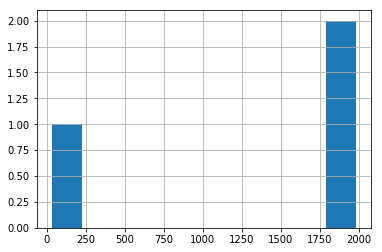

In [353]:
df['dia da coleta'][lambda v: v > 31].hist()

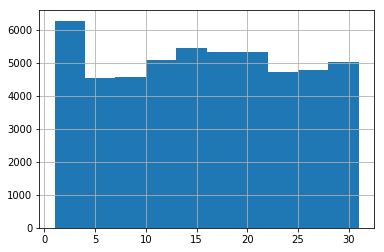

In [354]:
df['dia da coleta'][lambda v: v <= 31][lambda v: v > 0].hist()

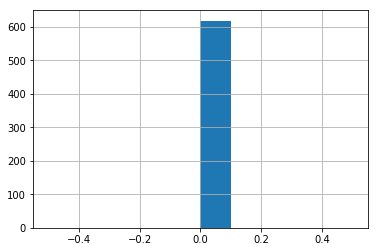

In [355]:
df['dia da coleta'][lambda v: v == 0].hist()

Temos dias iguais a 0, estes valores devem ter a cláusula de validade nula, outros acima de 31 estes precisam ser anulados

In [356]:
def invalidate_by_day(row):
    return None if row['dia da coleta'] == 0 else (False if row['dia da coleta'] > 31 else v.válido)
    
df.válido = df.T.apply(invalidate_by_day)

In [357]:
df[(df['dia da coleta'] > 31) | (df['dia da coleta'] == 0)]

,familia aceita,nome aceito,literatura,código da instituição,código da coleção,número de catálogo/código de barras,número do coletor,coletor,ano da coleta,mês da coleta,...,estado,município,localidade,latitude,longitude,família,nome científico,status SIG,válido,observações
id da ocorrência,,,,,,,,,,,,,,,,,,,,,
54c7ca870687f,ACANTHACEAE,Dicliptera squarrosa,NaN,NaN,MBM,36502,310,"Curial, O.",1946,5,...,PR,Morretes,NaN,-25.513830,-48.828220,ACANTHACEAE,Dicliptera squarrosa,True,None,
54c7ca8704319,ACANTHACEAE,Justicia brasiliana,NaN,NaN,MBM,80545,s.n.,"Tessmann, G.",1951,6,...,PR,Apucarana,NaN,-23.594383,-51.422400,ACANTHACEAE,Justicia brasiliana,True,None,
54c7ca8705b2e,ACANTHACEAE,Justicia brasiliana,NaN,NaN,MBM,4095,1951,"Tessmann, G.",1951,6,...,PR,Apucarana,NaN,-23.594383,-51.422400,ACANTHACEAE,Justicia brasiliana,True,None,
54c7ca8ef2489,ACANTHACEAE,Justicia brasiliana,NaN,NaN,MBM,285453,1837,"Wasum, R.",2003,3,...,RS,São Francisco de Paula,NaN,-29.219009,-50.470205,ACANTHACEAE,Justicia brasiliana,True,None,
54c7cab0f3e78,ACANTHACEAE,Justicia brasiliana,NaN,NaN,MBM,173594,145,"Ferrari Tomé, M.V.",1994,9,...,PR,Bandeirantes,NaN,-23.168520,-50.342012,ACANTHACEAE,Justicia brasiliana,True,None,
54c7cb6fdc54e,ACANTHACEAE,Justicia clausseniana,Registro inserido pelo analista Pablo,NaN,RB,27098,238,Santos Lima,NaN,6,...,RJ,Santa Maria Madalena,Pedra Dubois,-21.972385,-41.913696,ACANTHACEAE,Justicia clausseniana,True,False,
54c7cab7e66a1,ACANTHACEAE,Justicia genuflexa,NaN,NaN,MBM,115844,5527,"Sobral, M.",1987,3,...,BA,Ilhéus,NaN,-14.667186,-39.272814,ACANTHACEAE,Justicia genuflexa,True,None,"Trepadeira em interior da mata litorÃ¢nea, pró..."
54c7cab0f3c5d,ACANTHACEAE,Justicia laevilinguis,NaN,NaN,MBM,174195,2363,"Dombrowski, L.T.",1967,1,...,PR,Piraquara,NaN,-25.466451,-49.057475,ACANTHACEAE,Justicia laevilinguis,True,None,
54c7caa82cab6,ACANTHACEAE,Ruellia dissitifolia,NaN,NaN,MBM,174262,2023,"Dombrowski, L.T.",1966,11,...,PR,Curitiba,NaN,0.000000,0.000000,ACANTHACEAE,Ruellia dissitifolia,False,None,


In [358]:
df.columns

Index(['familia aceita', 'nome aceito', 'literatura', 'código da instituição',
       'código da coleção', 'número de catálogo/código de barras',
       'número do coletor', 'coletor', 'ano da coleta', 'mês da coleta',
       'dia da coleta', 'identificado por', 'estado', 'município',
       'localidade', 'latitude', 'longitude', 'família', 'nome científico',
       'status SIG', 'válido', 'observações'],
      dtype='object')

Agora vou limpar o campo *identificado por*, transformando **NaN** em string vazia

In [359]:
df['identificado por'] = df['identificado por'].apply(lambda v: "" if type(v) is not str and math.isnan(v) else v)

temos um coletor de nome 0, vou transformar em vazio:

In [365]:
df.ix[:, ['identificado por', 'coletor']]

,identificado por,coletor
id da ocorrência,,
54c7ca1f3d7b2,,"Martinelli, G."
54c7ca1f3d839,S. Profice,"Kollmann, L."
54c7ca1f3d8bb,S. Profice,"Folli, D.A."
54c7ca1f3d93b,S. Profice,"Folli, D.A."
54c7ca1f3d9bc,,"Carvalho, A.M.V. de"
54c7ca1f3da3d,,"Martinelli, G."
54c7ca1f3dabc,,"Martinelli, G."
54c7ca5212870,,"Sucre, D."
54c7ca722d1e6,,A. Carvalho


In [361]:
df['identificado por'] = df['identificado por'].apply(lambda v: "" if v == 0 else v)

In [366]:
df.ix[:, ['identificado por', 'coletor']]

,identificado por,coletor
id da ocorrência,,
54c7ca1f3d7b2,,"Martinelli, G."
54c7ca1f3d839,S. Profice,"Kollmann, L."
54c7ca1f3d8bb,S. Profice,"Folli, D.A."
54c7ca1f3d93b,S. Profice,"Folli, D.A."
54c7ca1f3d9bc,,"Carvalho, A.M.V. de"
54c7ca1f3da3d,,"Martinelli, G."
54c7ca1f3dabc,,"Martinelli, G."
54c7ca5212870,,"Sucre, D."
54c7ca722d1e6,,A. Carvalho


In [369]:
df.to_pickle('../resources/dados_ajustados.npz', compression='gzip')

In [371]:
df.to_excel('../resources/dados_ajustados.xls')